In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [127]:
#change the current work dir
os.chdir(os.getcwd())

In [128]:
from recommenders.collaborativebasedfiltering import UserBasedCFRecommender, ItemBasedCFRecommender
from recommenders.contentbasedfiltering import CBFRecommender
from recommenders.hybrid import HybridRecommender
from recommenders.mf_ials import ALSMFRecommender
from recommenders.sslimrmse import SSLIMRMSERecommender
from recommenders.svd import SVDRecommender
from recommenders.test import RandomRecommender, TopPopRecommender
from recommenders.recommender import Recommender
from recommenders.slimbpr import SLIM_BPR_Cython
from recommenders.lightfm import LightFMRecommender
from recommenders.p3alpha import P3alphaRecommender
from utils import *

In [129]:
df = optimize_parameters.load_df("SLIM_BPR_Cython")
df

,topK,learning_rate,lambda_i,lambda_j,symmetric,epochs,MAP
0,1253,0.0010,0.006876,0.078653,True,183,-0.036334
1,633,0.0010,0.008276,0.528744,True,154,-0.034125
2,700,0.0001,0.338742,0.446475,False,477,-0.037286
3,1138,0.0010,0.183113,0.796568,False,161,-0.036824
4,310,0.0100,0.123252,0.824382,False,82,-0.038998
5,2000,0.0001,1.000000,1.000000,True,500,-0.035610
6,1680,0.0100,0.936321,0.012600,False,476,-0.033900
7,2000,0.0100,0.000000,1.000000,False,1,-0.015678
8,1,0.0001,0.000000,1.000000,False,199,-0.009153
9,1,0.0010,1.000000,1.000000,False,500,-0.006604


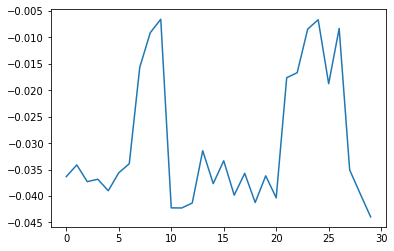

In [130]:
plt.plot(df["MAP"])

In [131]:
df.loc[df['MAP'].idxmin()]

topK                  1832
learning_rate       0.0001
lambda_i                 0
lambda_j                 0
symmetric            False
epochs                 500
MAP             -0.0439456
Name: 29, dtype: object